<a href="https://colab.research.google.com/github/prievarag/OTP-Stock-Price-forecast-with-LSTM/blob/main/OTP_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Importing the training set
#Historical data downloaded from https://bse.hu/Prices-and-Markets/Data-download
dataset_train = pd.read_excel('OTP_train.xlsx')
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
#check the first 5 value in the array
training_set[0:5]

array([[10800],
       [10840],
       [10960],
       [10940],
       [10970]])

In [ ]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
#training_set_scaled

In [ ]:
#Creating a data structure with 60 time steps and 1 output
X_train = []
y_train = []
for i in range(60, 993):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#Building and train the ANN
#Importing the libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
#Initializing the RNN
regressor = Sequential()

In [ ]:
#Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [ ]:
#Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
#Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
#Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
#Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
#Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#Fitting the RNN to the Training Set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
30/30 [==============================] - 15s 158ms/step - loss: 0.0571
Epoch 2/100
30/30 [==============================] - 5s 158ms/step - loss: 0.0131
Epoch 3/100
30/30 [==============================] - 5s 157ms/step - loss: 0.0109
Epoch 4/100
30/30 [==============================] - 5s 157ms/step - loss: 0.0087
Epoch 5/100
30/30 [==============================] - 5s 157ms/step - loss: 0.0082
Epoch 6/100
30/30 [==============================] - 5s 156ms/step - loss: 0.0064
Epoch 7/100
30/30 [==============================] - 5s 158ms/step - loss: 0.0069
Epoch 8/100
30/30 [==============================] - 5s 158ms/step - loss: 0.0064
Epoch 9/100
30/30 [==============================] - 5s 156ms/step - loss: 0.0071
Epoch 10/100
30/30 [==============================] - 5s 157ms/step - loss: 0.0055
Epoch 11/100
30/30 [==============================] - 5s 160ms/step - loss: 0.0057
Epoch 12/100
30/30 [==============================] - 5s 162ms/step - loss: 0.0059
Epoch 13/100

In [ ]:
#Making predictions and visualizing the results
dataset_test = pd.read_excel('OTP_test.xlsx')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
#Getting the predicted stock price for 2022
dataset_total = pd.concat((dataset_train['Close price'], dataset_test['Close price']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 102):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

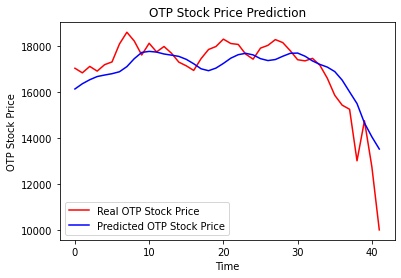

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real OTP Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted OTP Stock Price')
plt.title('OTP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('OTP Stock Price')
plt.legend()
plt.show()